# coding: utf-8

# # Automatic Ticket Assignment - Capstone Project 
# 
# ## Problem Statement - 
# 
# In most of the IT organizations, the assignment of incidents to appropriate IT groups is still a manual process. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service. 
# 
# _<font color=blue>This capstone project intends to reduce the manual intervention of IT operations or Service desk teams by automating the ticket assignment process.The goal here is to create a text classification based ML model that can automatically  classify any new tickets by analysing ticket description to one of the relevant Assignment groups, which could be later integrated to any ITSM tool like Service Now. Based on the ticket description our model will output the probability of assigning it to one of the 74 Groups.</font>_
# 
# The solution would be implemented using below approach:
# - Approach 1 - Using a traditional machine learning algorithm we would be classifying the tickets into one of the groups having more than 100 tickets.
# - Approach 2 - Firstly the ticket would be classified into L1/L2 or L3 classes and then it would be further classified into one of the given assignment groups.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [2]:
# ### A quick look at our data and inspect

# #### Read the data using pandas read_excel

In [3]:
df = pd.read_excel("../dataset/input_data.xlsx", encoding='utf-8')


In [4]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [5]:
# #### Shape of the data


In [6]:
df.shape

(8500, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [8]:
# ### Observation:
# 
# - There are 4 columns and all are string columns
# - There are totally 8500 rows and there seems to be mising values in Short description and Description columns, which needs to be looked into and handled
# - Caller columns mainly contains the details of the user who raised the incident and is of not much use in our analysis and can be dropped.
# - Assignment group is our predictor / target column with multiple classes. 
# - This is a Multiclass Classification problem 
# ### Lets drop Caller column as its does not seems to contribute in predicting the target


In [9]:
df_incidents = df.drop('Caller', axis=1)
# ### Lets see the number of classes in the Assignment group


In [10]:
df_incidents['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [11]:
len(df_incidents['Assignment group'].unique())

74

In [12]:
df_inc = df_incidents['Assignment group'].value_counts().reset_index()

In [13]:
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


In [14]:
# ### Lets visualize the percentage of incidents per assignment group
# Plot to visualize the percentage data distribution across different groups


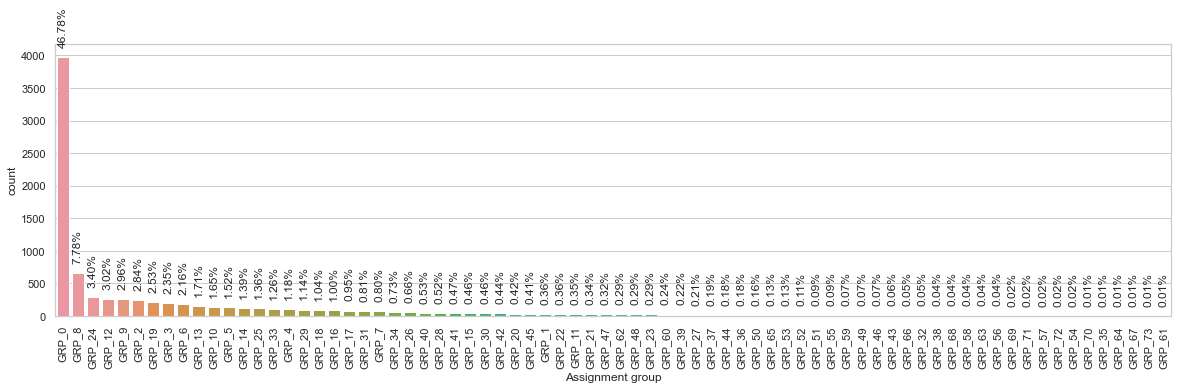

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df_incidents, order=df_incidents["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df_incidents.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')



In [29]:
# ### Observation
# - This is a imbalanced dataset, with majority of incidents are from Group 0 followed by Group 8 , 24 , 12 , 9 , 2 and so on
# - There are few classes which just have less 10 incidents pers class and even classed with just 1 or 2  incidents, need to see if we can drop those rows due to the lack of samples representing those classes. They might not be of much help as a predictor


In [30]:
df_incidents.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [32]:
df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


In [33]:
df_top_20=df_incidents['Assignment group'].value_counts().nlargest(20).reset_index()

Rectangle(xy=(-0.4, 0), width=0.8, height=3976, angle=0)
3976
Rectangle(xy=(0.6, 0), width=0.8, height=661, angle=0)
661
Rectangle(xy=(1.6, 0), width=0.8, height=289, angle=0)
289
Rectangle(xy=(2.6, 0), width=0.8, height=257, angle=0)
257
Rectangle(xy=(3.6, 0), width=0.8, height=252, angle=0)
252
Rectangle(xy=(4.6, 0), width=0.8, height=241, angle=0)
241
Rectangle(xy=(5.6, 0), width=0.8, height=215, angle=0)
215
Rectangle(xy=(6.6, 0), width=0.8, height=200, angle=0)
200
Rectangle(xy=(7.6, 0), width=0.8, height=184, angle=0)
184
Rectangle(xy=(8.6, 0), width=0.8, height=145, angle=0)
145
Rectangle(xy=(9.6, 0), width=0.8, height=140, angle=0)
140
Rectangle(xy=(10.6, 0), width=0.8, height=129, angle=0)
129
Rectangle(xy=(11.6, 0), width=0.8, height=118, angle=0)
118
Rectangle(xy=(12.6, 0), width=0.8, height=116, angle=0)
116
Rectangle(xy=(13.6, 0), width=0.8, height=107, angle=0)
107
Rectangle(xy=(14.6, 0), width=0.8, height=100, angle=0)
100
Rectangle(xy=(15.6, 0), width=0.8, height=97, an

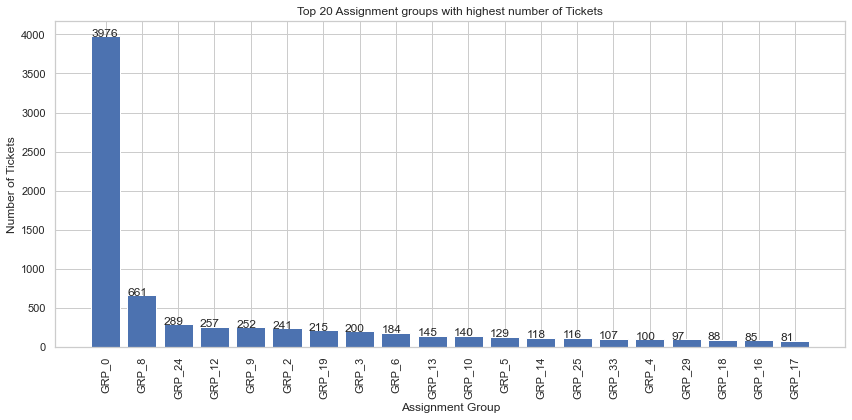

In [50]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel("Assignment Group")
plt.xticks(rotation=90)
plt.ylabel("Number of Tickets")

for bar in bars:
    print(bar)
    yval=bar.get_height()
    print(yval)
    plt.text(bar.get_x(), yval + .005 , yval)
    
plt.tight_layout()
plt.show()


In [51]:
# ### Lets view the bottom 20 Assignment groups with less number of tickets


In [56]:
df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()

,index,Assignment group
0,GRP_70,1
1,GRP_35,1
2,GRP_64,1
3,GRP_67,1
4,GRP_73,1
5,GRP_61,1
6,GRP_69,2
7,GRP_71,2
8,GRP_57,2
9,GRP_72,2


In [57]:
df_bottom_20 = df_incidents['Assignment group'].value_counts().nsmallest(20).reset_index()

Rectangle(xy=(-0.4, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(0.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(1.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(2.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(3.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(4.6, 0), width=0.8, height=1, angle=0)
1
Rectangle(xy=(5.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(6.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(7.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(8.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(9.6, 0), width=0.8, height=2, angle=0)
2
Rectangle(xy=(10.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(11.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(12.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(13.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(14.6, 0), width=0.8, height=3, angle=0)
3
Rectangle(xy=(15.6, 0), width=0.8, height=4, angle=0)
4
Rectangle(xy=(16.6, 0), width=0.8, height=4, angle=0)
4
Re

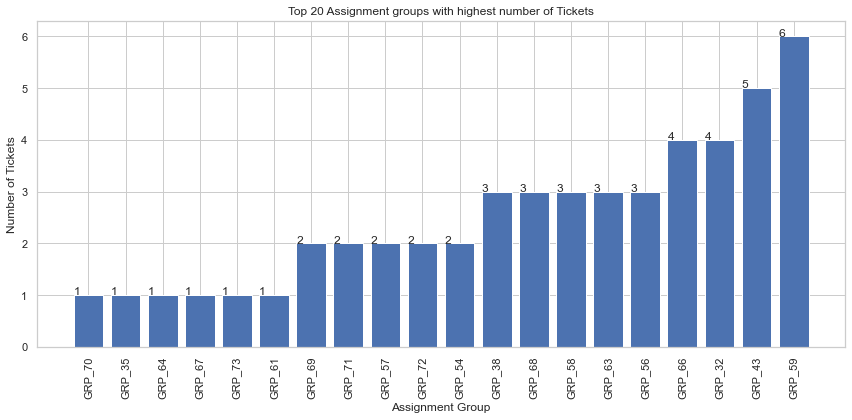

In [58]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'])
plt.title('Top 20 Assignment groups with smallest number of Tickets')
plt.xlabel("Assignment Group")
plt.xticks(rotation=90)
plt.ylabel("Number of Tickets")

for bar in bars:
    print(bar)
    yval=bar.get_height()
    print(yval)
    plt.text(bar.get_x(), yval + .005 , yval)
    
plt.tight_layout()
plt.show()


In [59]:
# ### Distribution of tickets counts in various bins


In [60]:
# ### Distribution of tickets counts in various bins


In [61]:
pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}


,Description,Ticket Count


In [69]:
df_inc.head()
len(df_inc[df_inc['Assignment group'] < 2])

6

In [71]:
df_bins=pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_inc[df_inc['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 5)& (df_inc['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 10)& (df_inc['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 20)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}


In [76]:
df_bins=df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket],ignore_index=True)

In [77]:
df_bins.head()

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16


(-1.1019890551483629,
 1.1224353061977403,
 -1.1079626168723997,
 1.1159579389457492)

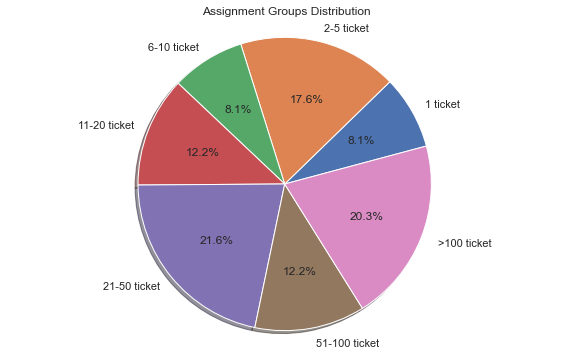

In [83]:
plt.figure(figsize=(10,6))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'], autopct='%1.1f%%', startangle=15, shadow=True)
plt.title('Assignment Groups Distribution')
plt.axis('equal')

In [84]:
# - We see that there are 6 Assignment Group’s for which just have 1 ticket in the dataset
# - There are 15 Assignment group’s which have more than 100 tickets. 
# - Only 20% of the Assignment groups have greater than 100 tickets.

In [85]:
df_incidents.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [88]:
df_incidents[df_incidents['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [89]:
df_incidents[df_incidents['Description'].isnull()]


,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


In [90]:

#Replace NaN values in Short Description and Description columns

df_incidents['Short description']=df_incidents['Short description'].replace(np.nan,'',regex=True)
df_incidents['Description']=df_incidents['Description'].replace(np.nan,'',regex=True)


In [91]:
df_incidents.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [93]:
df_incidents['New_Description']=df_incidents['Short description'] + df_incidents['Description'] 


In [94]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...
4,skype error,skype error,GRP_0,skype error skype error


In [95]:
df_incidents_level=df_incidents.copy()
df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))
# df_incidents_level = df_incidents.copy()
# df_incidents_level['Target'] = np.where(df_incidents_level['Assignment group']=='GRP_0','L1/L2',np.where(df_incidents_level['Assignment group'] =='GRP_8','L1/L2','L3'))
df_incidents_level.head()

,Short description,Description,Assignment group,New_Description,Target
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...,L1/L2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...,L1/L2
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...,L1/L2
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...,L1/L2
4,skype error,skype error,GRP_0,skype error skype error,L1/L2


In [96]:
x= df_incidents_level.Target.value_counts()
print(x)

L1/L2    4637
L3       3863
Name: Target, dtype: int64


Text(0, 0.5, 'sample')

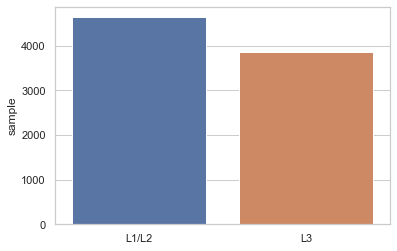

In [97]:
sns.barplot(x.index,x)
plt.gca().set_ylabel('sample')

In [98]:
# ### Characters in Short description by L1/L2 and L3


Text(0.5, 0.98, 'Characters in short description')

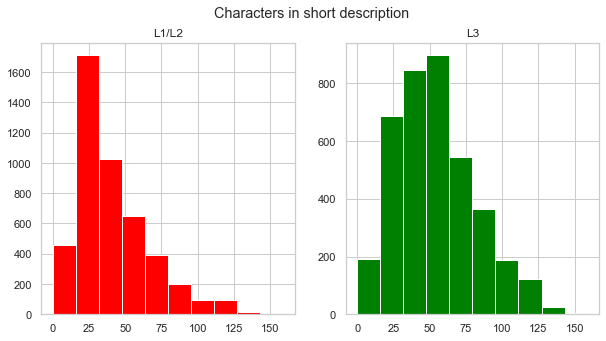

In [106]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len= df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.len()
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.len()
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Characters in short description')


In [107]:
# ### Words in Short description by L1/L2 and L3


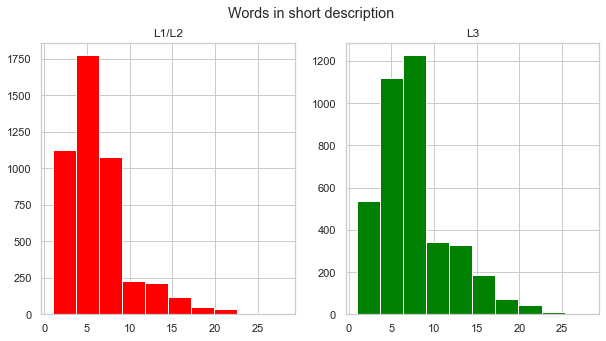

In [108]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().map(lambda x: len(str(x).split(" ")))
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Words in short description')
plt.show()


In [109]:
df_incidents_level['Short description']=df_incidents_level['Short description'].apply(str)

def ave_word_len(sentence):
    words  = sentence.split(" ")
    return ((sum((len(word) for word in words))/len(words)))

df_incidents_level["short_description_avg_word_len"] = df_incidents_level["Short description"].apply(ave_word_len)


In [110]:
df_incidents_level.head()

,Short description,Description,Assignment group,New_Description,Target,short_description_avg_word_len
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...,L1/L2,5.000000
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...,L1/L2,7.000000
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...,L1/L2,2.800000
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...,L1/L2,5.000000
4,skype error,skype error,GRP_0,skype error skype error,L1/L2,3.333333


In [111]:
# ### Average word length in Short description by L1/L2 and L3


/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/vishnoiprem/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


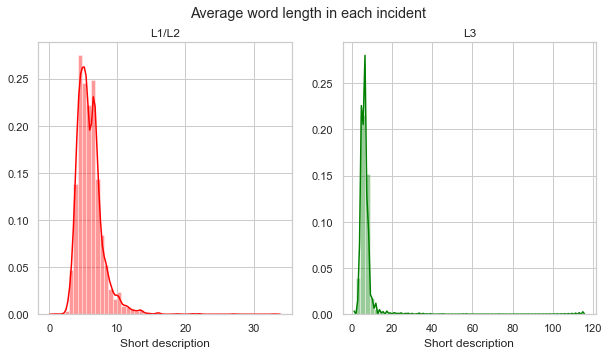

In [112]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_incidents_level[df_incidents_level['Target']=='L1/L2']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('L1/L2')
word=df_incidents_level[df_incidents_level['Target']=='L3']['Short description'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('L3')
fig.suptitle('Average word length in each incident');


In [113]:
# ### Number of upper case in Short description by L1/L2 and L3


In [114]:

df_incidents_level["short_description_nupper"] = df_incidents_level["Short description"].apply((lambda word: len([x for x in word.split() if x.isupper()])))
df_incidents_level[["Short description","short_description_nupper"]].sort_values(by = "short_description_nupper",ascending = False).head()



,Short description,short_description_nupper
4693,hzptilsw wusdajqv : log on balancing error for...,2
5964,add im:mfg_planner_reference to the miiadmin e...,2
4976,"please check the ale in detail, we have ongoin...",2
1848,erp SID_34 and erp SID_1 password reset,2
4324,reset password user zigioachstyac - SID_34 /SI...,2


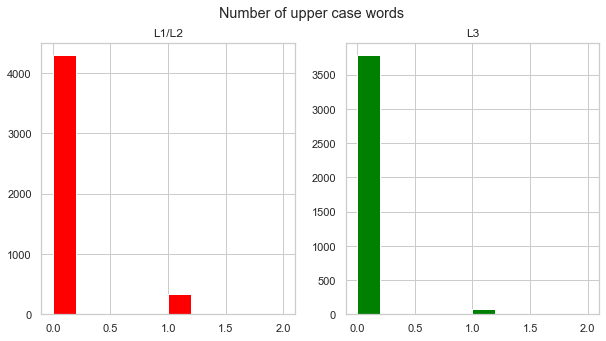

In [115]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_nupper']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_nupper']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('Number of upper case words')
plt.show()

In [116]:
# ### Number of digits in Short description by L1/L2 and L3


In [118]:
df_incidents_level["short_description_ndigits"] = df_incidents_level["Short description"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_incidents_level[["Short description","short_description_ndigits"]].sort_values(by = "short_description_ndigits",ascending = False).head()


,Short description,short_description_ndigits
5469,sto 5019179518 is for 2 pcs of material 631688...,4
2867,prdord 226040587 226040835 226040589 2...,4
6287,i am stuck. has 3 lines. lines 40 and 50...,4
145,unable to start dell 7350 2 in 1 device,3
3235,no audio in dell 7350 2 in 1 tablet,3


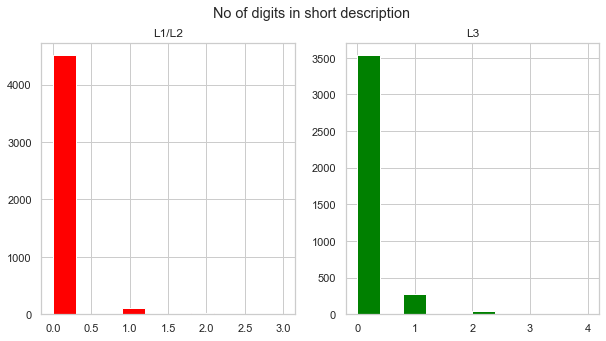

In [119]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_incidents_level[df_incidents_level['Target']=='L1/L2']['short_description_ndigits']
ax1.hist(text_len.dropna(),color='red')
ax1.set_title('L1/L2')
text_len=df_incidents_level[df_incidents_level['Target']=='L3']['short_description_ndigits']
ax2.hist(text_len.dropna(),color='green')
ax2.set_title('L3')
fig.suptitle('No of digits in short description')
plt.show()


In [120]:
# ## Let use word cloud to visualize the type of words used in Description
# 
# One very handy visualization tool for a data scientist when it comes to any sort of natural language processing is plotting "Word Cloud". A word cloud (as the name suggests) is an image that is made up of a mixture of distinct words which may make up a text or book and where the size of each word is proportional to its word frequency in that text (number of times the word appears). Here our words can simply be taken from the column "text"


In [121]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

In [122]:
from wordcloud import WordCloud, STOPWORDS 


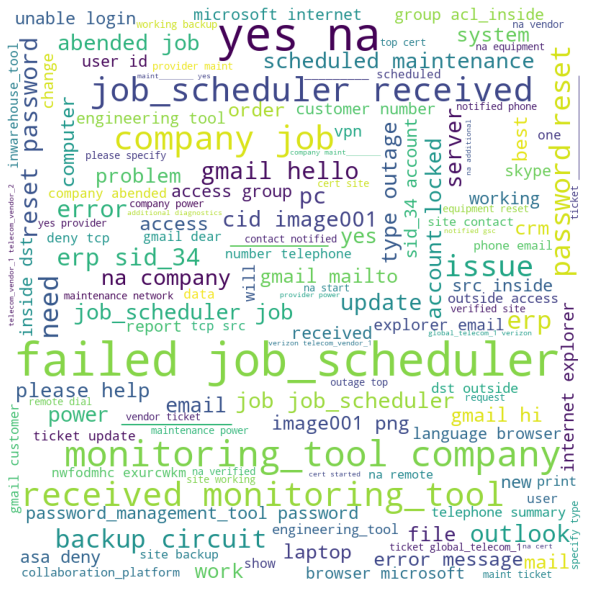

In [123]:
wordcloud = f_word_cloud(df_incidents.New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [124]:

# ## Lets view the word cloud of top 4 assignment groups to see the kind of tickets assigned to them

# ### Word Cloud for tickets with Assignment group 'GRP_0'


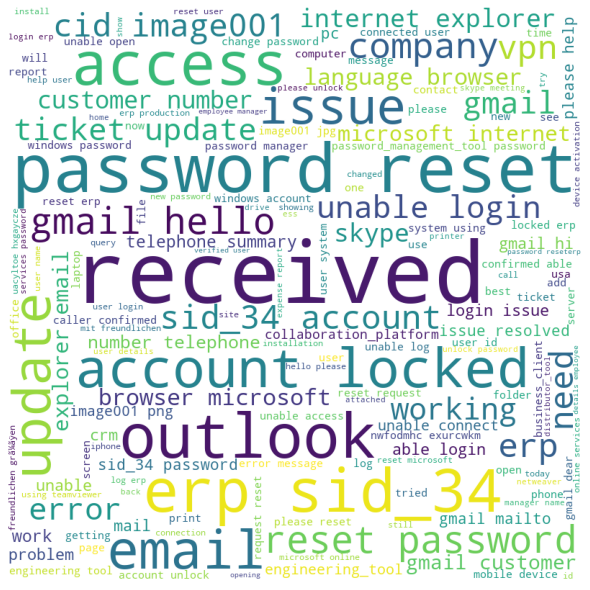

In [125]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [126]:
# GRP_0 seems to have tickets related to password reset, access issues , login issue, connectivity issue etc..

# ### Word Cloud for tickets with Assignment group 'GRP_8'

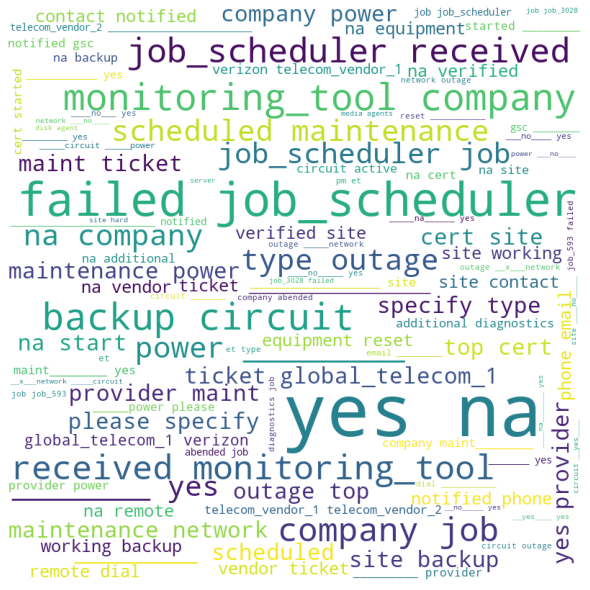

In [127]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [128]:
# GRP_8 seems to have tickets related to outage, job failures, monitoring tool etc

# ### Word Cloud for tickets with Assignment group 'GRP_12'

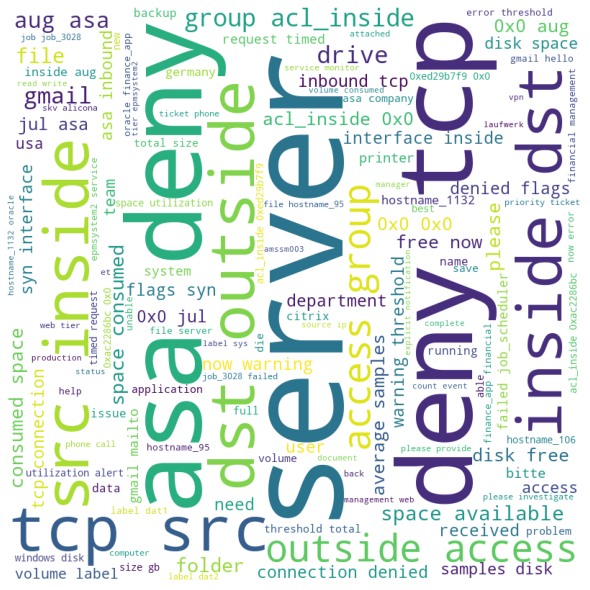

In [129]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [130]:
# GRP_12 contains tickets related to systems like  disk space issues, t network issues like tie out, citrix issue, connectivity timeout etc.
# ### Word Cloud for tickets with Assignment group 'GRP_24'


In [131]:
# ### Word Cloud for tickets with Assignment group 'GRP_24'


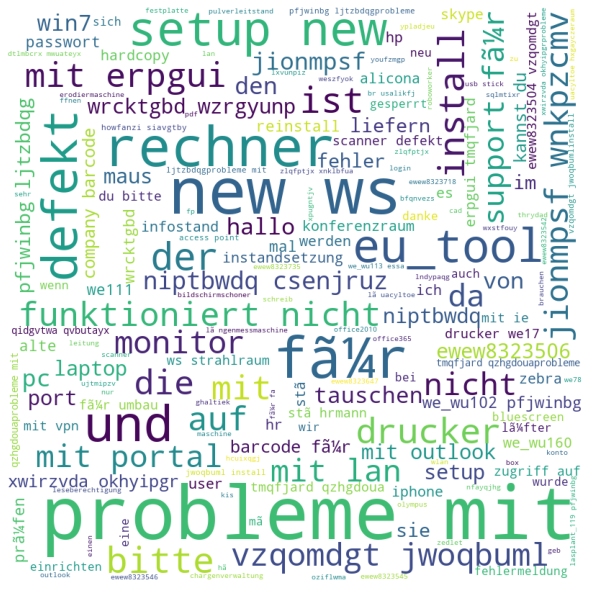

In [132]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [133]:
# GRP_24 - Tickets are mainly in german, these tickets need to be translated to english before passing it to our model.

# ### Seems like there are few tickets with description in some other language, probably in German


In [134]:
df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description


222     support fÃ¼r fa.gstry \arexjftu ohxdwnglsuppor...
223     probleme mit bluescreen .hallo ,\n\nes ist ern...
255     probleme mit laufwerk z: \laeusvjo fvaihgpxpro...
302     EU_tool ist sehr langsadgtym \ywqgrbnx jwnsyzb...
304     alte eq abholen \wrcktgbd wzrgyunpalte eq abho...
305     probleme lan an tgeyd1 \we_wu113 \wrcktgbd wzr...
306     support fÃ¼r we111\zlqfptjx xnklbfuasupport fÃ...
349     install EU_tool \laeusvjo fvaihgpxinstall EU_t...
441     probleme mit portal \knlrgsiv cqvuexjzprobleme...
446     setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...
453     probleme mit erpgui \tmqfjard qzhgdouaprobleme...
454     support fÃ¼r fa.thrydsss-funke \laeusvjo fvaih...
455     bildband  tauschen \drucker we68678 \vepxdgot ...
555     probleme mit fixiereinheit we101 \qvncizuf uei...
586     probleme mit bluescreen hallo ,\n\ngerade eben...
589     probleme mit lan fÃ¼r rechner erodiermaschine\...
744     drucker in lÃ¶we uacyltoe hxgayczeraum knicrht...
748     reinst

In [135]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df_incidents['New_Description'] = df_incidents['New_Description'].apply(fn_decode_to_ascii)


In [136]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...
4,skype error,skype error,GRP_0,skype error skype error


In [137]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  


In [138]:
df_incidents['language'] = df_incidents['New_Description'].apply(fn_lan_detect)


In [139]:
df_incidents["language"].value_counts()


en    7111
de     393
af     277
it     120
no     111
fr     105
nl      67
sv      51
es      43
ca      41
pl      34
da      29
pt      19
ro      15
sq      13
sl      12
cy      11
tl      10
et       8
fi       7
hr       6
id       5
cs       4
so       3
lv       2
sk       1
vi       1
lt       1
Name: language, dtype: int64

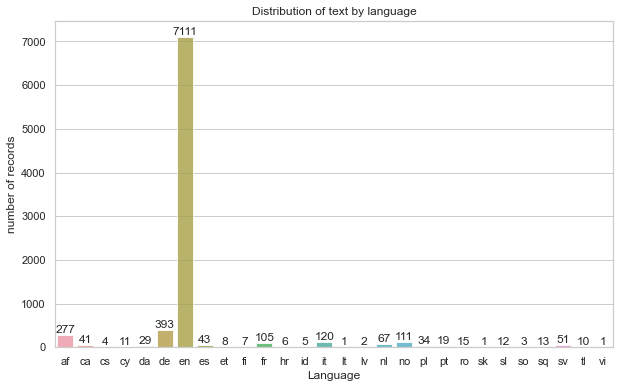

In [140]:
x = df_incidents["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();


In [141]:

# - We can see that most of the tickets are in english, followed by tickets in German language. We need to translate these into english.
# - We will be using google translate package to translate


In [142]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)


{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [143]:
# ### Translate the text to English


In [144]:
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    

In [145]:
df_incidents['English_Description'] = df_incidents.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)


In [146]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...,en,login issue-verified user details.(employee# &...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...,en,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...,en,cant log in to vpn\r\n\r\nreceived from: eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...,en,unable to access hr_tool pageunable to access ...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


In [147]:
# Note: Google Translate API is used for translating the german text, however there is limit imposed from Google on the number of requests from a particular ip address. So the traslation was done in batches and save to a file. Which will be used for further processing

# #### We mainly see that GRP_0 contains incidents related to account lockout, lets see if other groups also have incidents related to account lockout


In [148]:
df_incidents[df_incidents["Short description"].str.contains("account lock")]["Assignment group"].value_counts()


GRP_0     226
GRP_2       3
GRP_72      1
GRP_34      1
Name: Assignment group, dtype: int64

In [149]:
df_incidents[df_incidents["Short description"].str.contains("oneteam")]["Assignment group"].value_counts()


GRP_0     3
GRP_73    1
Name: Assignment group, dtype: int64

In [150]:
# Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. 


In [151]:
df_incidents.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...,en,login issue-verified user details.(employee# &...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...,en,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...,en,cant log in to vpn\r\n\r\nreceived from: eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...,en,unable to access hr_tool pageunable to access ...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


In [152]:
df_incidents.to_csv('../dataset/inc_tranlated.csv',encoding='utf-8', index=False)



In [154]:
df_tranlated_text = pd.read_csv('../dataset/inc_tranlated.csv',encoding='utf-8')


In [155]:
df_tranlated_text.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...,en,login issue-verified user details.(employee# &...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...,en,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...,en,cant log in to vpn\r\n\r\nreceived from: eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...,en,unable to access hr_tool pageunable to access ...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


In [157]:
df_tranlated_inc = df_tranlated_text.drop(['Short description','language','New_Description'],axis=1)


In [158]:
df_tranlated_inc.English_Description=df_tranlated_inc.English_Description.astype(str)


In [159]:
df_tranlated_inc.head()


,Description,Assignment group,English_Description
0,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...
3,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...
4,skype error,GRP_0,skype error skype error


In [160]:
df_tranlated_inc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Description          8499 non-null   object
 1   Assignment group     8500 non-null   object
 2   English_Description  8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [161]:

import string
import re
from collections import Counter
from nltk.corpus import stopwords



In [162]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers


In [164]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text


In [165]:
df_tranlated_inc['English_Description'].apply(lambda x: clean_text(x))


0       login issueverified user detailsemployee  mana...
1       outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2       cant log in to vpn eylqgodmybqkwiami cannot lo...
3       unable to access hrtool pageunable to access h...
4                                skype error skype error 
5       unable to log in to engineering tool and skype...
6       event critical the value of mountpoint thresho...
7        employment status  new nonemployee  employmen...
8       unable to disable add ins on outlookunable to ...
9                            ticket update on  update on 
10      engineering tool says not connected and unable...
11      hrtool site not loading page correctlyhrtool s...
12      unable to login to hrtool to sgxqsuojr xwbesor...
13      user wants to reset the passworduser wants to ...
14       unable to open payslips unable to open payslips 
15                           ticket update on  update on 
16      unable to login to company vpn xyzi am unable ...
17      when u

In [166]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['English_Description'].apply(lambda x: clean_text(x))


In [167]:
df_tranlated_inc.drop(['English_Description'],axis=1,inplace=True)


In [168]:
df_tranlated_inc.head()

,Description,Assignment group,cleaned_description
0,-verified user details.(employee# & manager na...,GRP_0,login issueverified user detailsemployee mana...
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn eylqgodmybqkwiami cannot lo...
3,unable to access hr_tool page,GRP_0,unable to access hrtool pageunable to access h...
4,skype error,GRP_0,skype error skype error


In [169]:
# ### Removal of Stop Words
# Now, let's get rid of the stopwords i.e words which occur very frequently but have no possible value like a, an, the, are etc.


In [170]:
from nltk.corpus import stopwords


In [171]:
stop = stopwords.words('english')

In [173]:
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [176]:
df_tranlated_inc['cleaned_description'].apply( lambda x: " ".join(x for x in str(x).split() if x not in stop))

0       login issueverified user detailsemployee manag...
1       outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2           cant log vpn eylqgodmybqkwiami cannot log vpn
3       unable access hrtool pageunable access hrtool ...
4                                 skype error skype error
5       unable log engineering tool skypeunable log en...
6       event critical value mountpoint threshold orac...
7       employment status new nonemployee employment s...
8       unable disable add ins outlookunable disable a...
9                                    ticket update update
10      engineering tool says connected unable submit ...
11      hrtool site loading page correctlyhrtool site ...
12      unable login hrtool sgxqsuojr xwbesorf cardsun...
13      user wants reset passworduser wants reset pass...
14              unable open payslips unable open payslips
15                                   ticket update update
16      unable login company vpn xyzi unable login com...
17      undock

In [177]:
df_tranlated_inc['cleaned_description'] = df_tranlated_inc['cleaned_description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))


In [178]:
df_tranlated_inc['cleaned_description'].head()


0    login issueverified user detailsemployee manag...
1    outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2        cant log vpn eylqgodmybqkwiami cannot log vpn
3    unable access hrtool pageunable access hrtool ...
4                              skype error skype error
Name: cleaned_description, dtype: object